# Comparativa de pronósticos
Para la investigación como se dijo en párrafos anteriores, es de vital importancia conocer si los pacientes post ACV presentarán un buen pronóstico después de la evaluación con la escala NIHSS de alta. Como nuestra variable predictora esta en un formato binario, es útil la interpretación para los resultados, es decir, podremos entender si los pacientes del hospital Herminda Martin existe un porcentaje predictivo que nos haga saber si el paciente tendrá un buen pronóstico o mal pronóstico con esa variable como su respaldo, asimismo la variable nos dirá el futuro del paciente con un estado 0 de buena predicción o 1 de mala predicción.

La exhaustividad, precisión y el F1 son los que serán evaluados para tomar la decisión cual algoritmo es más compatible con los datos procesados del tests.

## Pronóstico favorable post ACV
Desde la preparación de los datos en el paso 2 del método modificamos bastante la variable que queríamos predecir inicial, asociando la clasificación “leve” y “sin déficit” son parte de un buen pronóstico y su vez el estado 0 es favorable para los pacientes en la variable predictora.

In [59]:
total = data.values

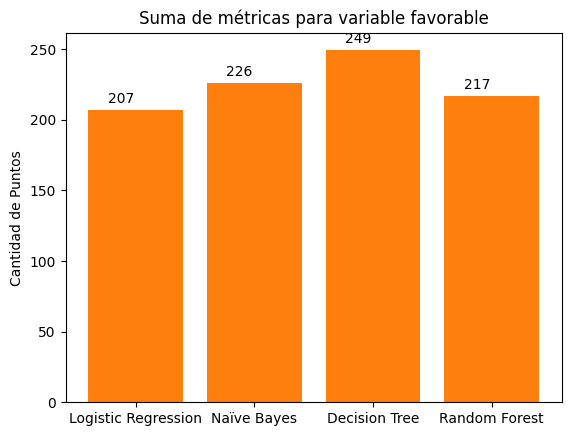

In [66]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame({'Precisión' : [59, 55, 83, 61],
                     'Exahustividad': [80, 100, 83, 85],
                     'F1': [68, 71, 83, 71]},
                    index=('Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'Random Forest'))
total = data.sum(axis=1)
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Puntos')
ax.set_title('Suma de métricas para variable favorable')

rects1 = ax.bar(x - width/2, total, width)

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
plt.bar(total.index, total)
plt.show()

Como se demuestra en el gráfico, la suma de los valores de las métricas de predicción en porcentaje supera los doscientos, pero no alcanzan los 300 que es el máximo para todos los valores de las métricas. El peor algoritmo en la suma de todas sus métricas es la Logistic Regression con 207 puntos, en cambio el mejor algoritmo con un total de 249 puntos es Decision Tree. 

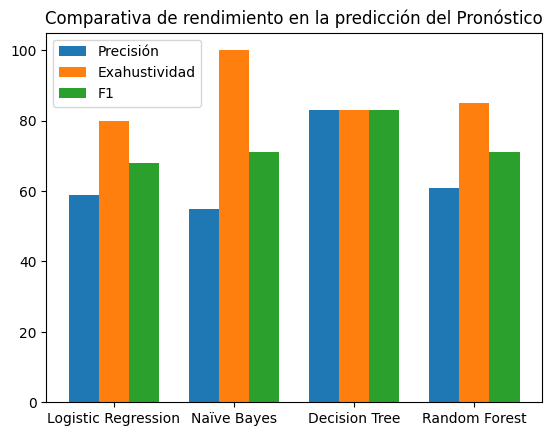

In [71]:
n = len(data.index)
x = np.arange(n)
width = 0.25

fig, ax = plt.subplots()
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_title('Comparativa de rendimiento en la predicción del Pronóstico')
plt.bar(x - width, data.Precisión, width=width, label='Precisión')
plt.bar(x, data.Exahustividad, width=width, label='Exahustividad')
plt.bar(x + width, data.F1, width=width, label='F1')
plt.xticks(x, data.index)
plt.legend(loc='best')
plt.show()

El grafico muestra los valores de Predicción, Exhaustividad y F1 en cada uno de los algoritmos. Se demuestra con el estado 0 que en el algoritmo más preciso fue Decision Tree y el menos preciso fue Naïve Bayes con un 100 \%. En la Exhaustividad el peor algoritmo fue Logistic Regression y el mejor fue Naive Bayes. El F1 peor fue Logistic Regression y el mejor fue Decision Tree.

Como resultado final la respuesta sobre el estado favorable del paciente el algoritmo con mejores resultados fue Decision Tree.

## Pronóstico menos favorable post ACV
Desde la preparación de los datos en el paso 2 del método modificamos bastante la variable que queríamos predecir inicial, asociando la clasificación “moderado”, “déficit importante” y “grave” son parte de un mal pronóstico y su vez el estado 1 es poco favorable para los pacientes en la variable predictora.


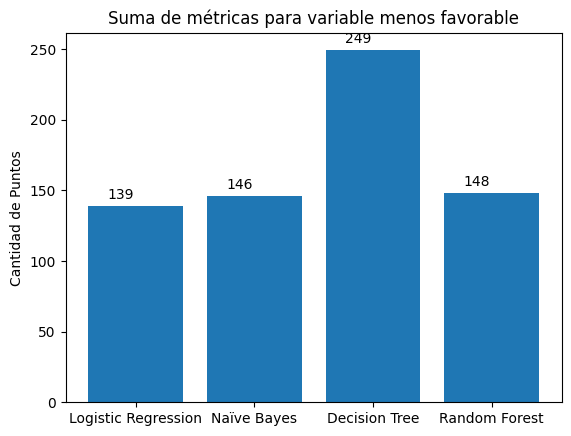

In [74]:
data = pd.DataFrame({'Precisión' : [60, 100, 83, 67],
                     'Exahustividad': [35, 17, 83, 35],
                     'F1': [44, 29, 83, 46]},
                    index=('Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'Random Forest'))

total = data.sum(axis=1)
rects1 = ax.bar(x - width/2, total, width)
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Puntos')
ax.set_title('Suma de métricas para variable menos favorable')
autolabel(rects1)
plt.bar(total.index, total)
plt.show()

Como se demuestra en el gráfico, la suma de los valores del estado 1 de las métricas de predicción en porcentaje supera los 130, pero no alcanzan los 300 que es el máximo para todos los valores de las métricas. El peor algoritmo en la suma de todas sus métricas es la Logistic Regression con 139 puntos, en cambio el mejor algoritmo con un total de 249 puntos es Decision Tree. En este caso los algoritmos en su mayoria fueron menos efectivos al momento de predecir en contraparte con el otro estado.

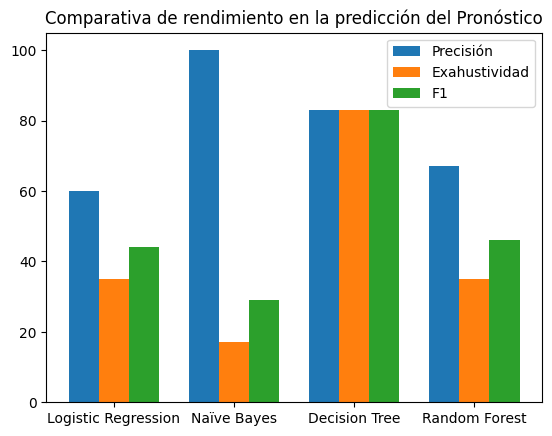

In [83]:
n = len(data.index)
x = np.arange(n)
width = 0.25

fig, ax = plt.subplots()
#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_title('Comparativa de rendimiento en la predicción del Pronóstico')
plt.bar(x - width, data.Precisión, width=width, label='Precisión')
plt.bar(x, data.Exahustividad, width=width, label='Exahustividad')
plt.bar(x + width, data.F1, width=width, label='F1')
plt.xticks(x, data.index)
plt.legend(loc='best')
plt.show()

El grafico muestra los valores de Predicción, Exhaustividad y F1 en cada uno de los algoritmos. Se demuestra con el estado 1 que en el algoritmo más preciso fue Naive Bayes con un 100\% de precisión y el menos preciso fue Logistic Regression con un 60\%. En la Exhaustividad el peor algoritmo fue Naive Bayes y el mejor fue Decision Tree. El F1 el peor fue Naive Bayes  y el mejor fue Decision Tree.

Como resultado final la respuesta sobre el estado favorable del paciente el algoritmo con mejores resultados fue Decision Tree.

# Comparación Final
En la comparación final se evalúa el porcentaje de predicción acumulada para la variable predictora en sus dos estados. Se hace incapie que el resultado muestra el reflejo de los datos obtenidos y que los resultados pueden cambiar dependiendo la BDD.

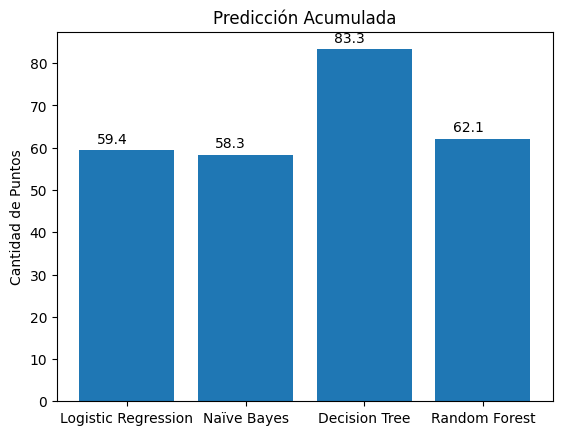

In [82]:
precisiones = [59.4, 58.3, 83.3, 62.1]

total = data.sum(axis=1)
rects1 = ax.bar(x - width/2, precisiones, width)
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de Puntos')
ax.set_title('Predicción Acumulada')
autolabel(rects1)
plt.bar(data.index, precisiones)
plt.show()

Los resultados arrojados por el grafico fueron los siguientes:
> El peor algoritmo con la tasa de predicción más baja con un 58.3\% es Naive Bayes.
> El antepenúltimo puesto con un 59,4\% de predicción es para Logistic Regression.
> El segundo puesto lo ocupa Random Forest con un 62,1\% de predicción.
> El mejor algoritmo con una ventaja 21,2\% sobre su antecesor es para Decision Tree que logra obtener un 83,3\% de predicción. 

Decision Tree logro alcanzar estabilidad en sus métricas predictivas y lo hicieron el algoritmo más preciso para este sistema de clasificación.


In [13]:
dfs.loc['Logistic Regression']

NameError: name 'dfs' is not defined

In [14]:
dfs.columns

NameError: name 'dfs' is not defined

In [15]:
dfs.index.values

NameError: name 'dfs' is not defined

NameError: name 'autolabel' is not defined

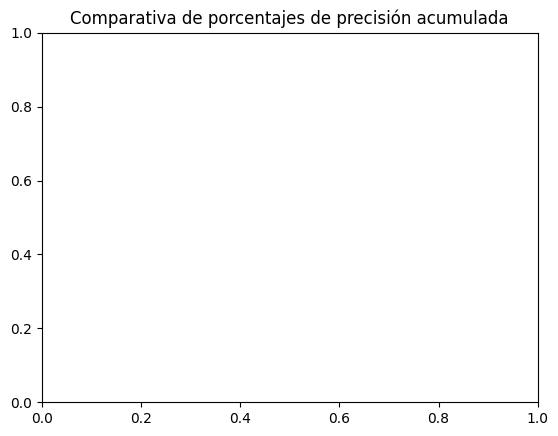

In [16]:
precisiones = [59.4, 58.3, 83.3, 62.1]
labels = ['Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'Random Forest']

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(labels))

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, precisiones, width)




fig, ax = plt.subplots()

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_title('Comparativa de porcentajes de precisión acumulada')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
fig.tight_layout()

# Muestra
ax.bar(labels, presiciones)
plt.show()

NameError: name 'autolabel' is not defined

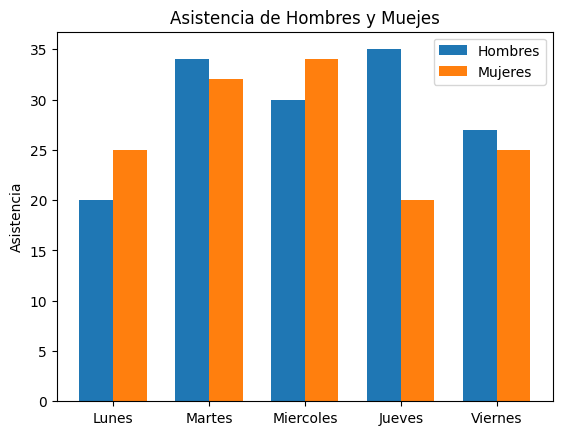

In [17]:


asistencia = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(asistencia))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, men_means, width, label='Hombres')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, women_means, width, label='Mujeres')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Asistencia')
ax.set_title('Asistencia de Hombres y Muejes')
ax.set_xticks(x)
ax.set_xticklabels(asistencia)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()



#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()

# Desde aqui  (59.4, 58.3, 83.3, 62.1)

In [18]:
columns = ['Precisión', 'Exahustividad', 'F1']
index = pd.MultiIndex.from_product([('Logistic Regression', 'Naïve Bayes', 'Decision Tree', 'Random Forest'), ('0', '1')], 
                                   names=['Algoritmo', 'Pronóstico'])
datos = [[59, 80, 68], [60, 35, 44],
         [55, 100, 71], [100, 17, 29],
         [83, 83, 83], [83, 83, 83],
         [61, 85, 71], [67, 35, 46]]

dfs = pd.DataFrame(datos, columns=columns, index=index)
dfs

Precisión  Exahustividad  F1
Algoritmo           Pronóstico                              
Logistic Regression 0                  59             80  68
                    1                  60             35  44
Naïve Bayes         0                  55            100  71
                    1                 100             17  29
Decision Tree       0                  83             83  83
                    1                  83             83  83
Random Forest       0                  61             85  71
                    1                  67             35  46

In [19]:
df.loc['Logistic Regression', '0']

NameError: name 'df' is not defined

In [20]:
columns = pd.MultiIndex.from_tuples([('Logistic Regression', '59.4%'), ('Naïve Bayes', '58.3%'), 
                                     ('Decision Tree', '83.3%'), ('Random Forest', '62.1%')], 
                                     names=['Algoritmos', 'Precisión Acumulada'])
index = pd.MultiIndex.from_product([('Precisión', 'Exahustividad', 'F1'),('0', '1')], 
                                   names=['Métrica', 'Pronóstico'])
datos = [[59, 55, 83, 61], [60, 100, 83, 67],
         [80, 100, 83, 85], [35, 17, 83, 35],
         [68, 71, 83, 71], [44, 29, 83, 46]]

df = pd.DataFrame(datos, columns=columns, index=index)
df

Algoritmos               Logistic Regression Naïve Bayes Decision Tree  \
Precisión Acumulada                    59.4%       58.3%         83.3%   
Métrica       Pronóstico                                                 
Precisión     0                           59          55            83   
              1                           60         100            83   
Exahustividad 0                           80         100            83   
              1                           35          17            83   
F1            0                           68          71            83   
              1                           44          29            83   

Algoritmos               Random Forest  
Precisión Acumulada              62.1%  
Métrica       Pronóstico                
Precisión     0                     61  
              1                     67  
Exahustividad 0                     85  
              1                     35  
F1            0                     71  
              1                     46

In [21]:
fila = dfs.index.values[0]

fila[0]

'Logistic Regression'